Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    classification_report,
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    r2_score,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

Dataset

In [3]:
# Load the dataframe
data = pd.read_excel("excavate.xlsx")
df = pd.DataFrame(data)

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  functional group   A  A_OS  A'  A'_OS  A_HOMO-  A_HOMO+   A_IE-   A_IE+  \
0       AgBaAuCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
1       AgBaAuHgO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
2       AgBaMoCdO6  Ag     3  Ba      2    0.585   -3.820  114.05  616.95   
3           AgBiO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   
4           AgBrO3  Ag     1  Ag      1    0.000   -4.405    0.00  731.00   

   A_LUMO-  ...   B_X+  B_Z_radii-  B_Z_radii+  B_e_affin-  B_e_affin+  \
0   0.6485  ...  2.115      0.2225      2.4375       145.4        77.4   
1   0.6485  ...  2.270      0.1250      2.5350       135.4        87.4   
2   0.6485  ...  1.925      0.2525      2.4675        70.0         2.0   
3   0.0000  ...  2.020      0.0000      1.9970         0.0        91.3   
4   0.0000  ...  2.960      0.0000      1.2000         0.0       324.7   

   PBE band gap        μ       μĀ     μ𝐵 ̅        t  
0        

Preprocessing

In [5]:
# Preprocessing
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Convert non-numeric columns to numeric using Label Encoding
for column in df.select_dtypes(include=['object']).columns:
    try:
        df[column] = LabelEncoder().fit_transform(df[column].astype(str))
    except Exception as e:
        print(f"Could not encode column {column} due to {e}")

# Handle missing values by filling with mean for numeric columns
df.fillna(df.mean(), inplace=True)


Missing values per column:
functional group    0
A                   0
A_OS                0
A'                  0
A'_OS               0
A_HOMO-             0
A_HOMO+             0
A_IE-               0
A_IE+               0
A_LUMO-             0
A_LUMO+             0
A_X-                0
A_X+                0
A_Z_radii-          0
A_Z_radii+          0
A_e_affin-          0
A_e_affin+          0
Bi                  0
B_OS                0
B'                  0
B'_OS               0
B_HOMO-             0
B_HOMO+             0
B_IE-               0
B_IE+               0
B_LUMO-             0
B_LUMO+             0
B_X-                0
B_X+                0
B_Z_radii-          0
B_Z_radii+          0
B_e_affin-          0
B_e_affin+          0
PBE band gap        0
μ                   0
μĀ                  0
μ𝐵 ̅                0
t                   0
dtype: int64


Classification


--- Classification ---

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       694
           1       0.92      0.79      0.85       337

    accuracy                           0.91      1031
   macro avg       0.91      0.88      0.89      1031
weighted avg       0.91      0.91      0.91      1031

Accuracy: 0.9088


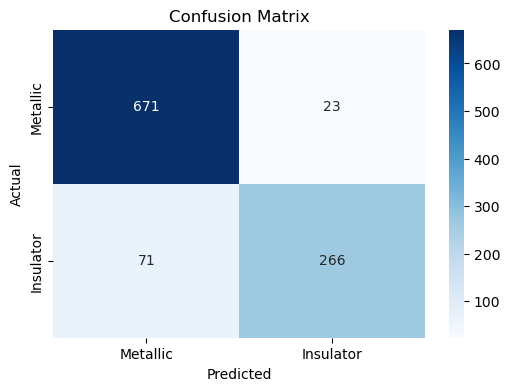

In [6]:
# --- Classification ---
print("\n--- Classification ---")
X_classification = df.drop(columns=['PBE band gap'])
y_classification = (df['PBE band gap'] >= 0.5).astype(int)  # 1 for Insulator, 0 for Metallic

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Train the model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print classification report and accuracy
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Metallic', 'Insulator'], yticklabels=['Metallic', 'Insulator'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Regression


Regression Metrics:
Mean Squared Error (MSE): 0.1252
Mean Absolute Error (MAE): 0.2271
R^2 Score: 0.7985

Regression Results (Actual vs Predicted):
      Actual  Predicted
3930  1.7258   1.696190
2689  0.9641   1.068897
3667  1.8073   2.431779
1908  2.9220   2.919821
1859  1.4248   1.370229


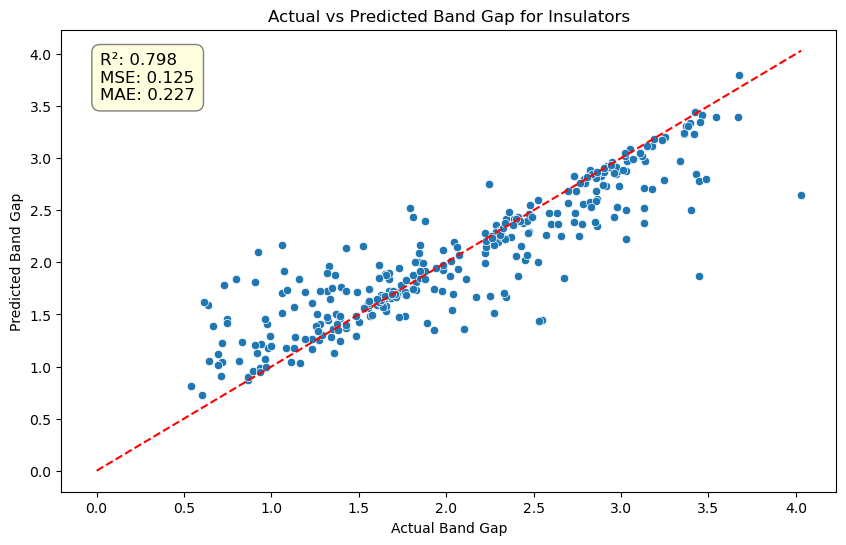

In [13]:

# --- Regression ---
insulators_data = df[df['PBE band gap'] > 0.5]
X_regression = insulators_data.drop(columns=['PBE band gap'])
y_regression = insulators_data['PBE band gap']

# Split the insulator dataset into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

# Create and train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = regressor.predict(X_test_reg)

# Calculate metrics
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f'\nRegression Metrics:')
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R^2 Score: {r2:.4f}')

# DataFrame for actual vs predicted values for regression
regression_results = pd.DataFrame({
    'Actual': y_test_reg,
    'Predicted': y_pred_reg
})
print("\nRegression Results (Actual vs Predicted):")
print(regression_results.head())

# Plot regression results with metrics
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_reg, y=y_pred_reg)
plt.xlabel('Actual Band Gap')
plt.ylabel('Predicted Band Gap')
plt.title('Actual vs Predicted Band Gap for Insulators')

# Diagonal reference line
plt.plot(
    [0, max(y_test_reg.max(), y_pred_reg.max())],
    [0, max(y_test_reg.max(), y_pred_reg.max())],
    color='red', linestyle='--'
)

# Annotate metrics on the plot
plt.text(
    0.05, 0.95,
    f'R²: {r2:.3f}\nMSE: {mse:.3f}\nMAE: {mae:.3f}',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round,pad=0.5', edgecolor='gray', facecolor='lightyellow')
)

plt.show()


Deep Learning

In [1]:
# --- Data Preprocessing ---
df_processed = df.copy()

# Encode categorical columns
categorical_cols = ['functional group', 'A', "A'", 'Bi', "B'"]
for col in categorical_cols:
    df_processed[col] = LabelEncoder().fit_transform(df_processed[col].astype(str))

# Define features (X) and target (y) for Classification
X_classification = df_processed.drop(columns=['PBE band gap'])
y_classification = (df_processed['PBE band gap'] >= 0.5).astype(int)  # Binary classification

# Normalize numerical features
scaler = StandardScaler()
X_classification = scaler.fit_transform(X_classification)

# Split data into training & testing sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# --- Build Enhanced Classification Model ---
classification_model = keras.Sequential([
    layers.Input(shape=(X_classification.shape[1],)),
    layers.Dense(512, activation="relu"),  # Increased number of neurons
    layers.BatchNormalization(),
    layers.Dropout(0.4),  # Increased dropout rate
    layers.Dense(256, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid")  # Output layer for binary classification
])

classification_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                              loss="binary_crossentropy",
                              metrics=["accuracy"])

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train Classification Model and store history
history_cls = classification_model.fit(X_train_cls, y_train_cls, epochs=40, batch_size=32,  # Increased epochs
                                        validation_data=(X_test_cls, y_test_cls),
                                        callbacks=[early_stopping])

# Evaluate Classification Model
cls_loss, cls_accuracy = classification_model.evaluate(X_test_cls, y_test_cls)
print(f"Classification Accuracy: {cls_accuracy:.4f}")

# Make predictions
y_pred_cls = (classification_model.predict(X_test_cls) > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test_cls, y_pred_cls)
recall = recall_score(y_test_cls, y_pred_cls)
f1 = f1_score(y_test_cls, y_pred_cls)

# Print the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# --- 2D Plot for Classification Accuracy ---
plt.figure(figsize=(10, 6))
plt.plot(history_cls.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history_cls.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Classification Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 41, 5))  # Set x-ticks for epochs
plt.ylim(0, 1)  # Set y-limits
plt.grid()
plt.legend()
plt.show()

NameError: name 'df' is not defined